# Shadow denoising

In [1]:
# importing necessary libraries
import numpy as np
import imageio
import matplotlib.pyplot as plt
import matplotlib as mpl

In [76]:
I = imageio.imread("../images/shadowE.jpg")
# plt.figure(figsize=(16,16))
# plt.subplot(221)
# plt.imshow(I)
# plt.title("Shadowed image")
# plt.subplot(222)
# plt.imshow(I[:,:,0])
# plt.title("R")
# plt.subplot(223)
# plt.imshow(I[:,:,1])
# plt.title("G")
# plt.subplot(224)
# plt.imshow(I[:,:,2])
# plt.title("B")

In [77]:
def range_adjustment(img, minvalue=0, maxvalue=255):
    currmin = np.min(img)
    currmax = np.max(img)
    
    img_u8 = np.zeros(img.shape, dtype=np.uint8)
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            img_u8[x,y] = ((img[x,y]-currmin)*(maxvalue - minvalue)//(currmax - currmin)) + minvalue
    
    return img_u8    

In [78]:
I_hsv = mpl.colors.rgb_to_hsv(I)
# plt.figure(figsize=(16,16))
# plt.subplot(221)
# plt.imshow(I)
# plt.title("Shadowed image")
# plt.subplot(222)
# plt.imshow(range_adjustment(I_hsv[:,:,0],0,255))
# plt.title("H")
# plt.subplot(223)
# plt.imshow(range_adjustment(I_hsv[:,:,1],0,255))
# plt.title("S")
# plt.subplot(224)
# plt.imshow(range_adjustment(I_hsv[:,:,2],0,255))
# plt.title("V")

In [79]:
def limiarization(img, thr = 0.5):
    threshold = thr * np.max(img)
    mask = np.zeros(img.shape, dtype = np.uint8)
    mask[np.where(img < threshold)] = 1
    return mask

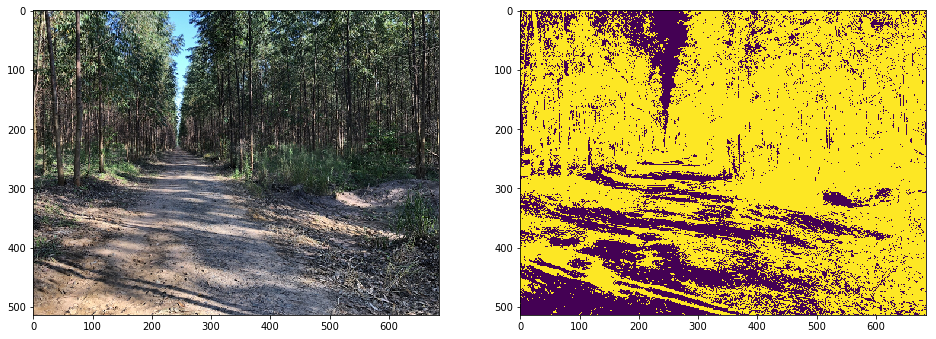

In [80]:
shadow_mask = limiarization(I_hsv[:,:,2],0.47)
plt.figure(figsize=(16,8))
plt.subplot(121)
plt.imshow(I)
plt.subplot(122)
plt.imshow(shadow_mask)

In [27]:
def histogram(img, range_values):
    # creates an empty histogram array with size proportional to the number of pixel values 
    histogram = np.zeros(range_values).astype(int)

    # count every quantity of every value present in image
    for i in range(range_values):
        # locate all pixels with value i in a vector
        pix_i_values = np.where(img == i)
        
        # get quantity of pixels by the previous vector array length
        histogram[i] = pix_i_values[0].shape[0]
            
    return histogram

<BarContainer object of 256 artists>

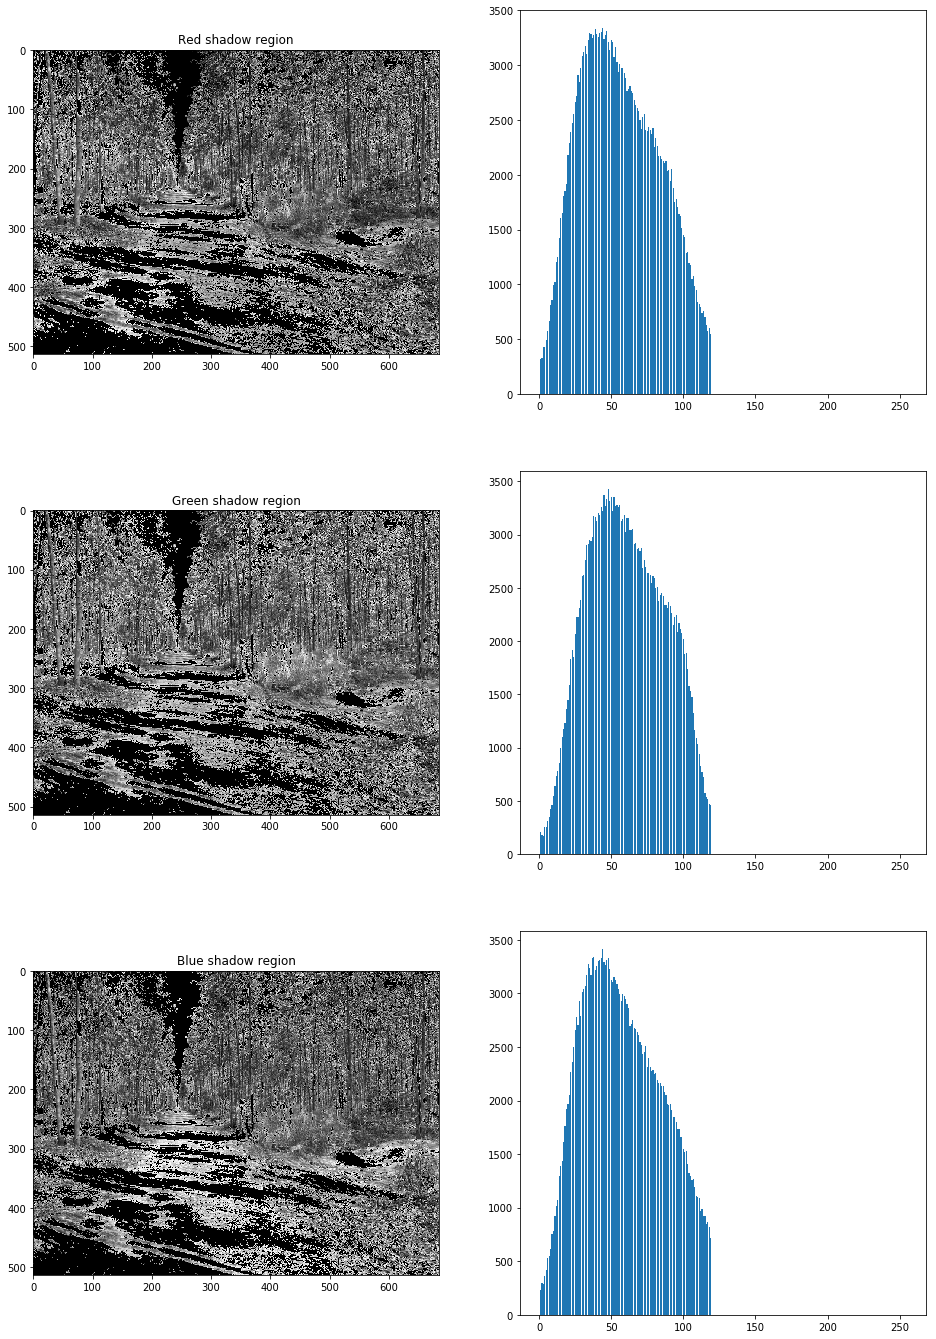

In [41]:
Rshadow = shadow_mask*I[:,:,0]
Gshadow = shadow_mask*I[:,:,1]
Bshadow = shadow_mask*I[:,:,2]

Rshadow_histogram = histogram(Rshadow[np.where(Rshadow>0)], 256)
Gshadow_histogram = histogram(Gshadow[np.where(Gshadow>0)], 256)
Bshadow_histogram = histogram(Bshadow[np.where(Bshadow>0)], 256)

plt.figure(figsize=(16,24))
plt.subplot(321)
plt.imshow(Rshadow, cmap='gray')
plt.title("Red shadow region")
plt.subplot(322)
plt.bar(range(256), Rshadow_histogram)
plt.subplot(323)
plt.imshow(Gshadow, cmap='gray')
plt.title("Green shadow region")
plt.subplot(324)
plt.bar(range(256), Gshadow_histogram)
plt.subplot(325)
plt.imshow(Bshadow, cmap='gray')
plt.title("Blue shadow region")
plt.subplot(326)
plt.bar(range(256), Bshadow_histogram)

<BarContainer object of 256 artists>

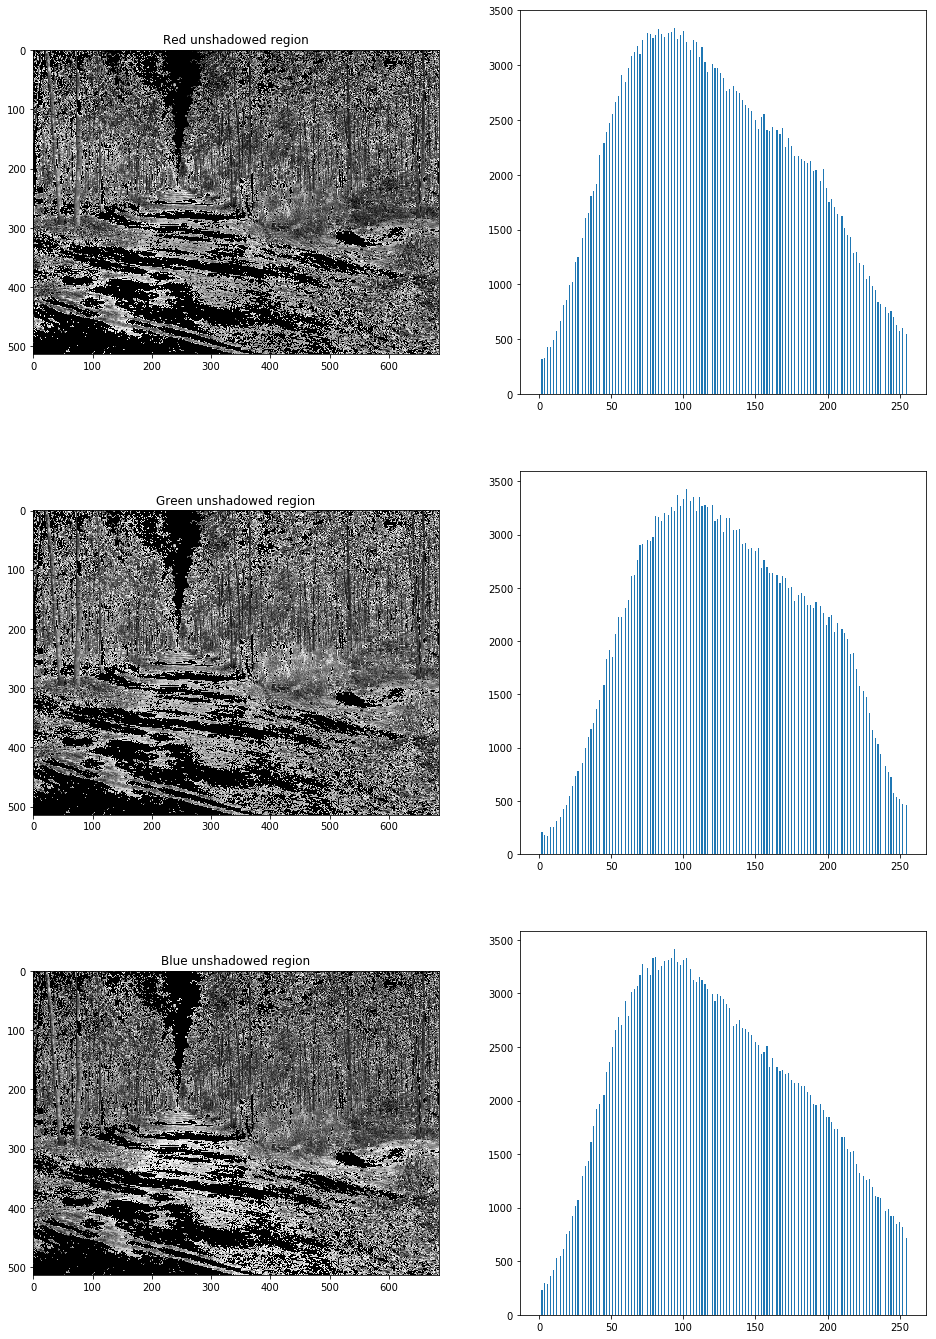

In [93]:
Runshadow = np.zeros(Rshadow.shape, dtype = np.uint8)
Gunshadow = np.zeros(Gshadow.shape, dtype = np.uint8)
Bunshadow = np.zeros(Bshadow.shape, dtype = np.uint8)

Runshadow =  range_adjustment(Rshadow, 0, 255)
Gunshadow =  range_adjustment(Gshadow, 0, 255)
Bunshadow =  range_adjustment(Bshadow, 0, 255)

Runshadow_histogram = histogram(Runshadow[np.where(Runshadow>0)], 256)
Gunshadow_histogram = histogram(Gunshadow[np.where(Gunshadow>0)], 256)
Bunshadow_histogram = histogram(Bunshadow[np.where(Bunshadow>0)], 256)

plt.figure(figsize=(16,24))
plt.subplot(321)
plt.imshow(Runshadow, cmap='gray')
plt.title("Red unshadowed region")
plt.subplot(322)
plt.bar(range(256), Runshadow_histogram)
plt.subplot(323)
plt.imshow(Gunshadow, cmap='gray')
plt.title("Green unshadowed region")
plt.subplot(324)
plt.bar(range(256), Gunshadow_histogram)
plt.subplot(325)
plt.imshow(Bunshadow, cmap='gray')
plt.title("Blue unshadowed region")
plt.subplot(326)
plt.bar(range(256), Bunshadow_histogram)

Text(0.5, 1.0, 'unshadowed region')

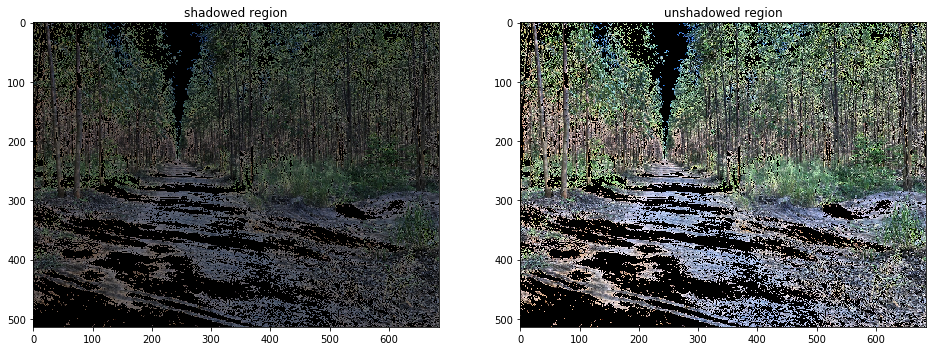

In [94]:
shadow = np.dstack((Rshadow, Gshadow, Bshadow))
unshadow = np.dstack((Runshadow, Gunshadow, Bunshadow))

plt.figure(figsize = (16,16))
plt.subplot(121)
plt.imshow(shadow)
plt.title("shadowed region")
plt.subplot(122)
plt.imshow(unshadow)
plt.title("unshadowed region")

5
255
51
255
38
255


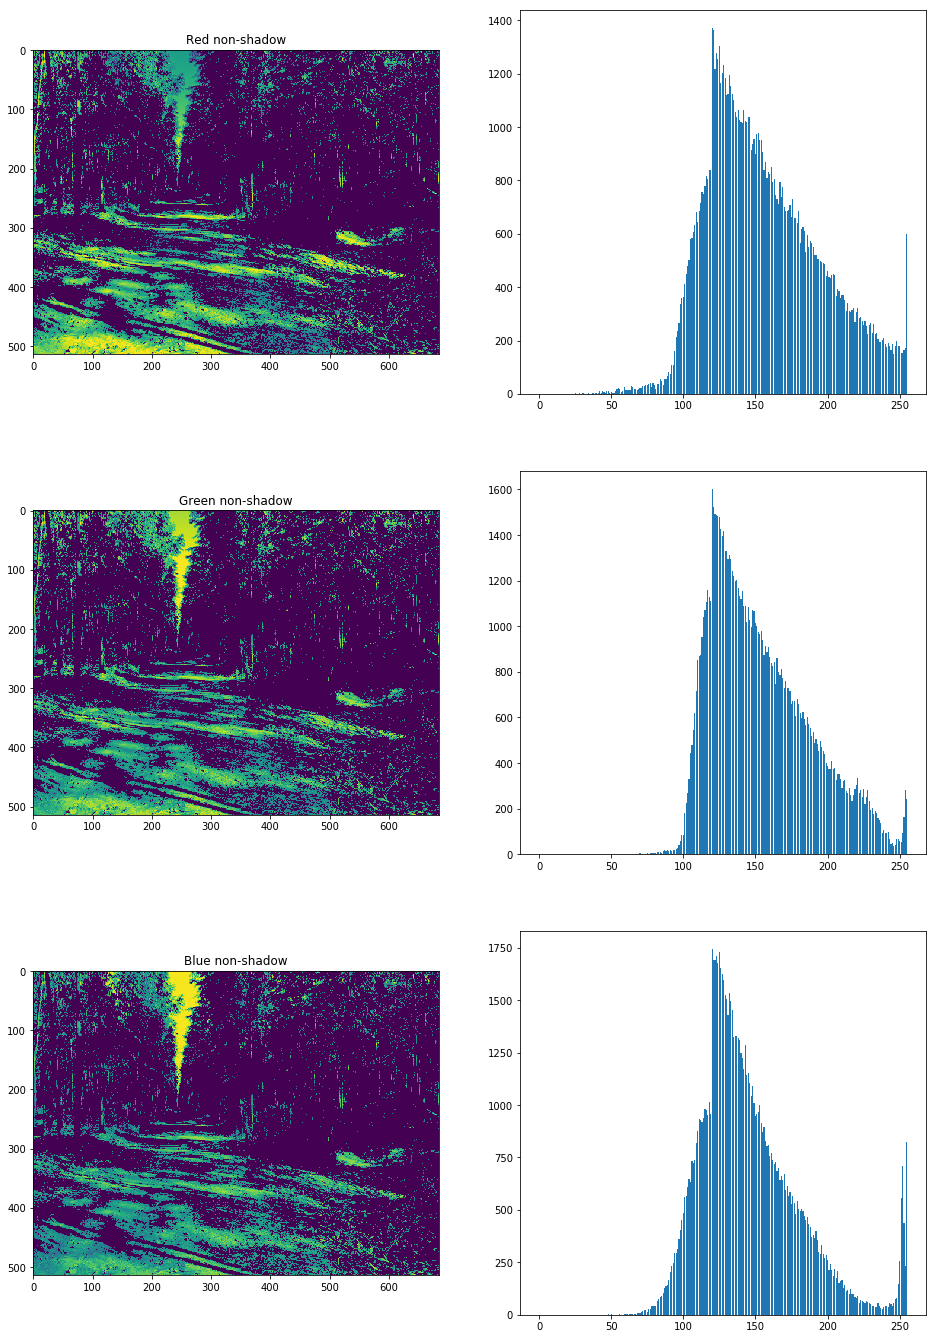

In [95]:
Rnonshadow = (1-shadow_mask)*I[:,:,0]
Gnonshadow = (1-shadow_mask)*I[:,:,1]
Bnonshadow = (1-shadow_mask)*I[:,:,2]

Rnonshadow_histogram = histogram(Rnonshadow[np.where(Rnonshadow>0)], 256)
Gnonshadow_histogram = histogram(Gnonshadow[np.where(Gnonshadow>0)], 256)
Bnonshadow_histogram = histogram(Bnonshadow[np.where(Bnonshadow>0)], 256)

plt.figure(figsize=(16,24))
plt.subplot(321)
plt.imshow(Rnonshadow)
plt.title("Red non-shadow")
plt.subplot(322)
plt.bar(range(256), Rnonshadow_histogram)
plt.subplot(323)
plt.imshow(Gnonshadow)
plt.title("Green non-shadow")
plt.subplot(324)
plt.bar(range(256), Gnonshadow_histogram)
plt.subplot(325)
plt.imshow(Bnonshadow)
plt.title("Blue non-shadow")
plt.subplot(326)
plt.bar(range(256), Bnonshadow_histogram)

print(np.min(Rnonshadow[np.where(Rnonshadow>0)]))
print(np.max(Rnonshadow))
print(np.min(Gnonshadow[np.where(Gnonshadow>0)]))
print(np.max(Gnonshadow))
print(np.min(Bnonshadow[np.where(Bnonshadow>0)]))
print(np.max(Bnonshadow))

Text(0.5, 1.0, 'unshadowed image')

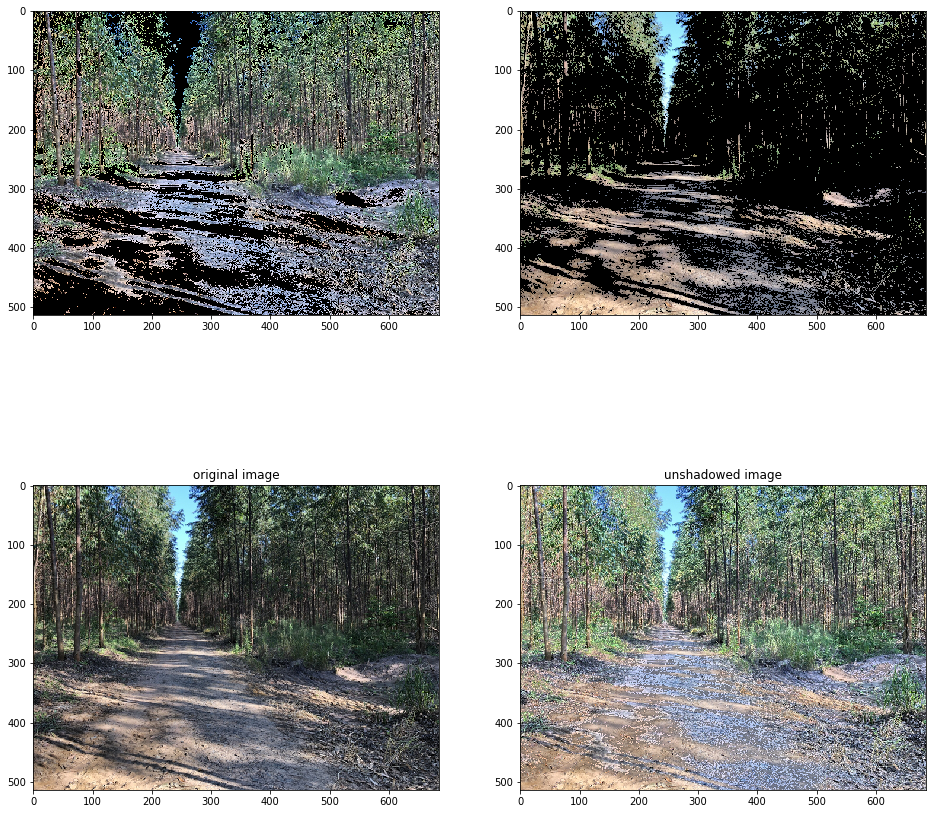

In [99]:
Iunshadowed = unshadow + nonshadow

plt.figure(figsize=(16,16))
plt.subplot(221)
plt.imshow(unshadow)
plt.subplot(222)
plt.imshow(nonshadow)
plt.subplot(223)
plt.imshow(I)
plt.title("original image")
plt.subplot(224)
plt.imshow(Iunshadowed)
plt.title("unshadowed image")